In [49]:
# Configure Python path to find uuv_mission module
import os
import sys

# Add the project root directory to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

In [50]:
if project_root not in sys.path:
    sys.path.insert(0, project_root)
print(f"Added {project_root} to Python path")

# Verify the module can be found
print("\nCurrent Python path:")
for path in sys.path:
    print(path)

Added c:\Users\tommb\OneDrive\Documents\Uni\Y3\B1\Coding Practical 1\b1-coding-practical-mt24 to Python path

Current Python path:
c:\Users\tommb\OneDrive\Documents\Uni\Y3\B1\Coding Practical 1\b1-coding-practical-mt24
C:\Users\tommb\anaconda3\python312.zip
C:\Users\tommb\anaconda3\DLLs
C:\Users\tommb\anaconda3\Lib
C:\Users\tommb\anaconda3
c:\Users\tommb\OneDrive\Documents\Uni\Y3\B1\Coding Practical 1\b1-coding-practical-mt24\venv

c:\Users\tommb\OneDrive\Documents\Uni\Y3\B1\Coding Practical 1\b1-coding-practical-mt24\venv\Lib\site-packages


# Import Required Modules
Now that we've configured the Python path, let's import the necessary modules from our project.

In [51]:
# Import required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Import our project modules
try:
    from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
    from uuv_mission.control import Controller
    print("Successfully imported uuv_mission modules")
except ImportError as e:
    print(f"Error importing uuv_mission modules: {e}")

Successfully imported uuv_mission modules


In [52]:
# Set up the correct path to mission.csv
data_dir = os.path.join(project_root, 'data')
mission_file = os.path.join(data_dir, 'mission.csv')

# Verify the file exists
if os.path.exists(mission_file):
    print(f"Found mission file at: {mission_file}")
else:
    print(f"Error: Could not find mission file at: {mission_file}")

# Store the path for later use
MISSION_FILE_PATH = mission_file

Found mission file at: c:\Users\tommb\OneDrive\Documents\Uni\Y3\B1\Coding Practical 1\b1-coding-practical-mt24\data\mission.csv


# Submarine Mission Control Simulation

This notebook demonstrates the performance of a PD controller for an underwater submarine mission. We'll:
1. Set up a mission from CSV data
2. Create and configure the controller
3. Run a simulation with random disturbances
4. Visualize and analyze the results

In [53]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import Controller

## Create Mission and Controller

Let's create a submarine instance and configure a PD controller with appropriate gains. We'll load a mission from our CSV file.

In [54]:
# Create submarine and controller instances
sub = Submarine()
controller = Controller(kp=0.15, kd=0.6)  # PD controller gains tuned for good performance
closed_loop = ClosedLoop(sub, controller)

# Load mission from CSV file using the verified path
mission = Mission.from_csv(MISSION_FILE_PATH)

## Run Simulation with Random Disturbances

Now we'll simulate the mission with random disturbances to test the controller's robustness.

In [55]:
# Run simulation with random disturbances
# We'll use a moderate disturbance variance of 0.5
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance=0.5)

## Visualize Results

Let's plot the completed mission to see how well the controller performed in following the reference trajectory while avoiding the cave boundaries.

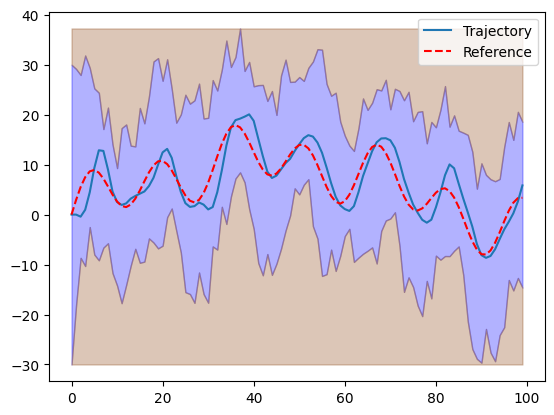

In [56]:
# Plot the mission results
trajectory.plot_completed_mission(mission)